<a href="https://colab.research.google.com/github/singhalka/Rstudio_project/blob/master/Intro_Gdrive_Colab_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Google Colab? 
---
---
 **!!SHORTCUT: if you are familiar with Jupyter Notebooks... Colab is a Jupyter Notebook stored on Google Drive!!**

 In google Colab, you can write and run python code, without having to set up any environments on your local machine. You can also gain access to powerful machines with GPUs/TPUs to run your analysis.


 ## LET's Switch to the GPUs now! 

Go to:

**EDIT > Notebook Settings > Hardware accelerator > GPU** 

**you can also select python2 & python3**
---> we are using python3!!!!!



### Feel free to edit the version you are using now. But to save, it will force you to make a copy to your drive. 




All the key board shortcuts can be seen by hitting (Ctrl/⌘ + m + h)

Add a new cell with the [+Code] and [+Text] icons in the upper left of this window.
---

There are two types of cells: Code & Markdown (explained below), **for CODE cells you can run and advance cells with (shift+enter), or you can run in place with (Cmd/Ctrl+Enter)**, double click **MARKDOWN** cells to edit text:

**1. Markdown:**

---

Markdown can function like a text editor or a $\LaTeX$ environment [see: $s = \frac{1}{1 + e^{x^{-1}}}$], for jotting down notes, displaying images/videos, or equations. Unfortunatily, there is no spelll chek so plesae excuse the spelling mstakes we make in this tutorial.

Lists and Bulletted and Numbered are easily displayed:

*   item 1
*   item 2

1. item 1
2. item 2


**2. Code:**

In [0]:
# this is a python code block. Hit (shift+enter) to run [or click the play button... but don't do that.]
# the output will be displayed below. You are not limited to boring python numeric output, you can also display
# figures and more advanced functionality (interactive figures, videos, etc...). 


#first we need to import all of the necessary packages into this environment:
#import packages:
import numpy as np 
from time import sleep
import seaborn as sns
import pandas as pd 
import xarray as xr
import datetime

# data visualization
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.dates as mdates

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

#if you need to install a package outside of this env. pip or apt-get works in colab:
!pip install eofs #thank you Andrew Dawson (https://ajdawson.github.io/eofs/latest/)
from eofs.standard import Eof
!pip install netCDF4
from netCDF4 import Dataset,num2date, date2num
!apt-get -qq install python-cartopy python3-cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature


     |████████████████████████████████| 1.0MB 5.0MB/s 
  Created wheel for eofs: filename=eofs-1.4.0-cp36-none-any.whl size=1100357 sha256=98e021cc26ca05cccdf67d817ed7943f4a30cd32e323be7a49148bccb11fbb55
  Stored in directory: /root/.cache/pip/wheels/47/f8/64/72dfdafae89c380846799c1396957cddd04decf459242ea988
Successfully built eofs
     |████████████████████████████████| 4.1MB 5.0MB/s 
     |████████████████████████████████| 317kB 45.7MB/s 
Selecting previously unselected package python-pkg-resources.
(Reading database ... 135718 files and directories currently installed.)
Preparing to unpack .../0-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-pyshp.
Preparing to unpack .../1-python-pyshp_1.2.12+ds-1_all.deb ...
Unpacking python-pyshp (1.2.12+ds-1) ...
Selecting previously unselected package python-shapely.
Preparing to unpack .../2-python-shapely_1.6.4-1_amd64.deb ...
Unpacking python-shapely (1.

In [0]:
#math 
xcc = 10
print(1+1)
print('Hello WOrld')

2
Hello WOrld


In [0]:
xcc

#AGU Machine Learning Tutorial: Google Colab, Mounting Data, and Data Exploration / Preprocessing
---
---
---
---

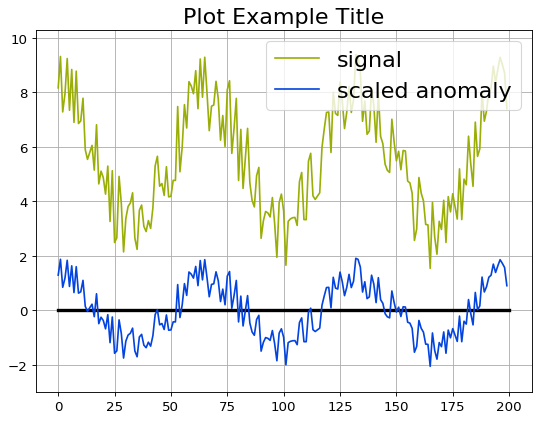

In [0]:
#variables run in each cell become global variables which you can access across any other code cell. 

#You are able to create inline figures in this notebook
#example figure:

#line colors: 
c1 = sns.xkcd_rgb["puke green"]
c2 = sns.xkcd_rgb["blue"]

# yango = 200 
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
analyze_that = 3*np.random.rand(200) + 2.5*np.cos(np.arange((1/200),6*np.pi,(1/200)*6*np.pi)) + 4
analyze_thatA = (analyze_that - np.mean(analyze_that))/np.std(analyze_that)
plt.plot([0,200],[0,0],linewidth=3,color='k')
plt.plot(analyze_that,color=c1,label='signal')
plt.plot(analyze_thatA,color=c2,label='scaled anomaly')
plt.title('Plot Example Title',fontsize=20)
plt.legend(fontsize=20)
plt.ylim([-3,10.3])
plt.grid(True)
plt.show()

# Google Drive Set-up and Data Access for AGU - ML Tutorial:
---
---

**We will use google drive to access all the data and Colab notebooks for this tutorial**
 
## Getting Data: 

In [0]:
#get data for this section:
!wget http://portal.nersc.gov/project/dasrepo/AGU_ML_Tutorial/sst.mon.mean.trefadj.anom.1880to2018.nc
!wget http://portal.nersc.gov/project/dasrepo/AGU_ML_Tutorial/nino34.long.anom.data.txt

--2019-12-08 05:01:52--  http://portal.nersc.gov/project/dasrepo/AGU_ML_Tutorial/sst.mon.mean.trefadj.anom.1880to2018.nc
Resolving portal.nersc.gov (portal.nersc.gov)... 128.55.201.128
Connecting to portal.nersc.gov (portal.nersc.gov)|128.55.201.128|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://portal.nersc.gov/project/dasrepo/AGU_ML_Tutorial/sst.mon.mean.trefadj.anom.1880to2018.nc [following]
--2019-12-08 05:01:52--  https://portal.nersc.gov/project/dasrepo/AGU_ML_Tutorial/sst.mon.mean.trefadj.anom.1880to2018.nc
Connecting to portal.nersc.gov (portal.nersc.gov)|128.55.201.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 432481041 (412M) [application/x-netcdf]
Saving to: ‘sst.mon.mean.trefadj.anom.1880to2018.nc’

sst.mon.mean.trefad 100%[===================>] 412.45M  56.9MB/s    in 7.7s    

2019-12-08 05:02:00 (53.9 MB/s) - ‘sst.mon.mean.trefadj.anom.1880to2018.nc’ saved [432481041/432481041]

--2019-12-

#Data Preprocessing and the Data Sets in this Tutorial
---
---
The purpose of the remainder of this Notebook is Fourfold: 

1. Describes the Machine Learning Workflow
2. Describes the importance of data splitting for cross validation.
3. Describes Data Normalization and it's role in machine learning. 
4. Introduces the datasets used in this tutorial. 



ML_workflow ![WEC_d](https://drive.google.com/uc?id=1q0Bcdq_3QbyIPIb6oaBl_wui_P7Sn5_D)

The above figure shows the typical machine learning project work flow. 

1. **Data Download/Clean and Exploration**
2. **Data Transformation for Machine Learning**
3. Training the Model 
4. Testing the Model on validation data / Hyperparameter Tuning
5. Evaluating the Model on testing data
6. **Model Interpretability [not pictured]**

# Clean, Prepare, and Explore Data: 

We will go through data exploration for one of the datasets used in this tutorial: Monthly sea surface temperature Anomalies from the [Cobe V2. dataset](https://www.esrl.noaa.gov/psd/data/gridded/data.cobe2.html). 


Let's load this dataset and look at the meta data: 




#Data We Will Use in this Tutorial: 
---


## Data Set 1:  Nino 3.4 prediction from global SSTs


ENSO 1998![ENSO1998](https://drive.google.com/uc?id=1xWRCICvpskmpOSwWWz78GRmCsO3Twdym
)

### Dataset Description: 
Nino3.4 index time series from the [NCAR Climate Gateway](https://www.earthsystemgrid.org/) and Monthly SST Anomalies from the [Cobe V2. dataset](https://www.esrl.noaa.gov/psd/data/gridded/data.cobe2.html)


**Nino3.4** is a time series of sea surface temperature [SST] anomalies averaged in the tropical pacific (lat [5N-5S], lon [170W-120W]). The index typically consists of a 5- month running mean SST field

The **Cobe V2.** data set is a 1.0 degree latitude x 1.0 degree longitude global grid (180x360) resolution sea surface tempearture field which spans latitude: 89.5N - 89.5S, and longitude: 0.5E - 359.5E. is analysis, a daily SST field is constructed as a sum of a trend, interannual variations, and daily changes, using in situ SST and sea ice concentration observations. 

### Task: 

A neural network is tasked with identifying whether a sea-surface temperature (SST) pattern is characteristic of a positive (El Nino) or negative (La Nina) phase of the El Nino Southern Oscillation (ENSO).





**let's take a look a the data and do some exploratory analysis:** 



In [0]:
fname = 'sst.mon.mean.trefadj.anom.1880to2018.nc'
ssts = Dataset(fname)
print(ssts)
print('===========================================================')
print(ssts['time'])
print('===========================================================')
print(ssts['sst'])


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    CDI: Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/cdi)
    history: Sun Jun 23 18:30:46 2019: cdo selyear,1880/2018 sst.mon.mean.trefadj.anom.nc sst.mon.mean.trefadj.anom.1880to2018.nc
Wed Jun 19 21:23:41 2019: cdo ymonsub sst.mon.mean.trefadj.nc sst.mon.mean.trefadj.1980to2010.climo.nc sst.mon.mean.trefadj.anom.nc
Wed Jun 19 21:23:11 2019: cdo shifttime,372hours sst.mon.mean.nc sst.mon.mean.trefadj.nc
Created 12/2012 from data obtained from JRA by ESRL/PSD
    institution: NOAA ESRL/PSD
    Conventions: CF-1.2
    title: created 12/2013 from data provided by JRA
    platform: Analyses
    citation: Hirahara, S., Ishii, M., and Y. Fukuda,2014: Centennial-scale sea surface temperature analysis and its uncertainty. J of Climate, 27, 57-75. http://journals.ametsoc.org/doi/pdf/10.1175/JCLI-D-12-00837.1
    References: http://www.esrl.noaa.gov/psd/data/gridded/cobe2.html
    datas

**Create Time Vector**

In [0]:
# This creates the datevect and time list for Cobe from the netcdf file: 
# the Netcdf4 package contains easy functions to get your time vectors 
# as long as the metadata is good (which should be for most modeling centers)
timelist = []
for nn in ssts['time'][:]:
   timelist.append(num2date(nn,units=ssts['time'].units).strftime("%b %Y"))

dtvec = [datetime.datetime.strptime(d,'%b %Y').date() for d in timelist]

print('original time vec:',ssts['time'][0:3])
print('original time units:',ssts['time'].units)
print('Netcdf4 transformed:',dtvec[0:3])
print('last time step:',dtvec[-1])

original time vec: [-4002.5 -3971.5 -3942.5]
original time units: days since 1891-1-1 00:00:00
Netcdf4 transformed: [datetime.date(1880, 1, 1), datetime.date(1880, 2, 1), datetime.date(1880, 3, 1)]
last time step: 2018-12-01


**We now use the netCDF4 package to load our NC files**

In [0]:
## and load the datasets and begin analysis:
## load ENSO dataset we will use for this workshop:
print('...loading Cobe dataset...')
fname = 'sst.mon.mean.trefadj.anom.1880to2018.nc'
ssts = Dataset(fname)
lats = ssts['lat'][:]
lon = ssts['lon'][:]
sst = ssts['sst'][:]
print('...Done...')


...loading Cobe dataset...
...Done...


/usr/lib/python3/dist-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


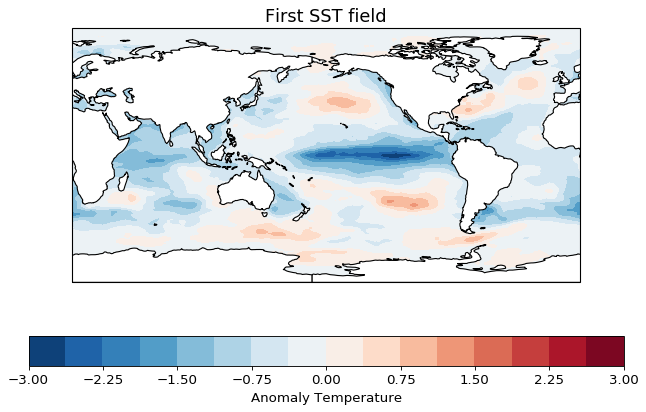

In [0]:
#it is global data spanning monthly data 1880-2018:
#here is the first snapshot: 
#We can use the Cartopy toolbox to put this on a global map. 

plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
clevs = np.linspace(-3, 3, 17)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = ax.contourf(np.squeeze(lon), np.squeeze(lats), np.squeeze(sst[0,:,:]), clevs,
                   transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r)
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal',shrink=0.8)
cb.set_label('Anomaly Temperature', fontsize=12)
plt.title('First SST field', fontsize=16)
plt.show()


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


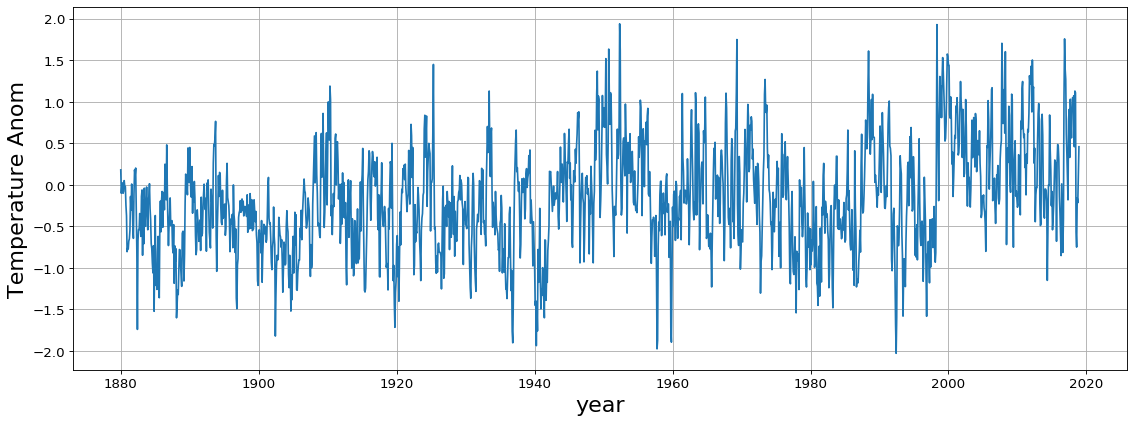

Trend is still present!


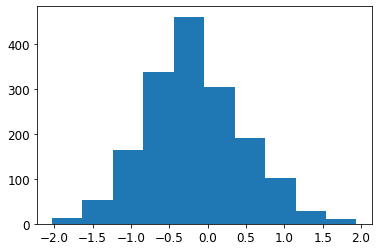

In [0]:
# Let's plot a single point in the midlatitudes time to see if we can gain anymore insight: 
latwant = 32  #N
lonwant = 180 #dateline

#find the closest index to the desired points:
latidx = (np.abs(lats- latwant)).argmin()
lonidx = (np.abs(lon- lonwant)).argmin()


plt.figure(num=None, figsize=(17, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(dtvec,sst[:,latidx,lonidx])
plt.grid(True)
plt.ylabel('Temperature Anom', fontsize=20)
plt.xlabel('year', fontsize=20)
plt.show()

print('Trend is still present!')

plt.hist(sst[:,latidx,lonidx])
plt.show()


Next we will use the pandas tool box to make sure that our datasets are aligned in time. This is a very convenient framework to ensure that data is being handled well

In [0]:
#lets use pandas and explore the Nino3.4 index:
fname34 = 'nino34.long.anom.data.txt'
DFnino34 = pd.read_csv(fname34,delim_whitespace=True,names=['year','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
print('Here is the Nino3.4 index straight from the text file:')
print(DFnino34.head())

#here is the full time series in order: 
TS34 = DFnino34.iloc[:,1:].to_numpy().flatten()

#and the corresponding date list: 
timelist34 = []
for yr in range(DFnino34.shape[0]):
  for mon in range(1,13):
    timelist34.append(DFnino34.columns[mon]+' '+str(DFnino34['year'][yr]))


#align the Nino34 file and the Cobe dataset: 

tl34 = pd.DataFrame({'time':timelist34})
print('Nino 3.4 time dataframe:')
print(tl34.head())
#add index column to determine where time file starts/ends
tl34['ind34'] = tl34.index
tl = pd.DataFrame({'time':timelist})
print('Cobe Date dataframe:')
print(tl.head())
#merge the dataframes to get the correct indices for each time series
mergedTL= pd.merge(tl34,tl,on='time')
print('Merged time dataframe:')
print(mergedTL.head())
indalign = mergedTL.ind34
TS34 = TS34[indalign]

print('shape of nino34 index:',TS34.shape)
print('shape of Cobe SST data:',sst.shape)
print('Voila!')

Here is the Nino3.4 index straight from the text file:
   year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
0  1870 -1.00 -1.20 -0.83 -0.81 -1.27 -1.08 -1.04 -0.88 -0.53 -0.92 -0.79 -0.79
1  1871 -0.25 -0.58 -0.43 -0.50 -0.70 -0.53 -0.60 -0.33 -0.24 -0.33 -0.31 -0.58
2  1872 -0.72 -0.62 -0.50 -0.77 -0.62 -0.52 -0.32 -0.85 -1.02 -0.94 -0.79 -0.88
3  1873 -0.78 -1.01 -1.31 -0.67 -0.53 -0.48 -0.58 -0.39 -0.34 -0.78 -0.77 -0.70
4  1874 -0.93 -1.06 -1.40 -0.94 -0.86 -0.72 -1.00 -1.05 -1.13 -1.25 -1.33 -1.14
Nino 3.4 time dataframe:
       time
0  Jan 1870
1  Feb 1870
2  Mar 1870
3  Apr 1870
4  May 1870
Cobe Date dataframe:
       time
0  Jan 1880
1  Feb 1880
2  Mar 1880
3  Apr 1880
4  May 1880
Merged time dataframe:
       time  ind34
0  Jan 1880    120
1  Feb 1880    121
2  Mar 1880    122
3  Apr 1880    123
4  May 1880    124
shape of nino34 index: (1668,)
shape of Cobe SST data: (1668, 180, 360)
Voila!


**Let's plot the Nino3.4 Time Series and look at the Nino/Nina thresholds**

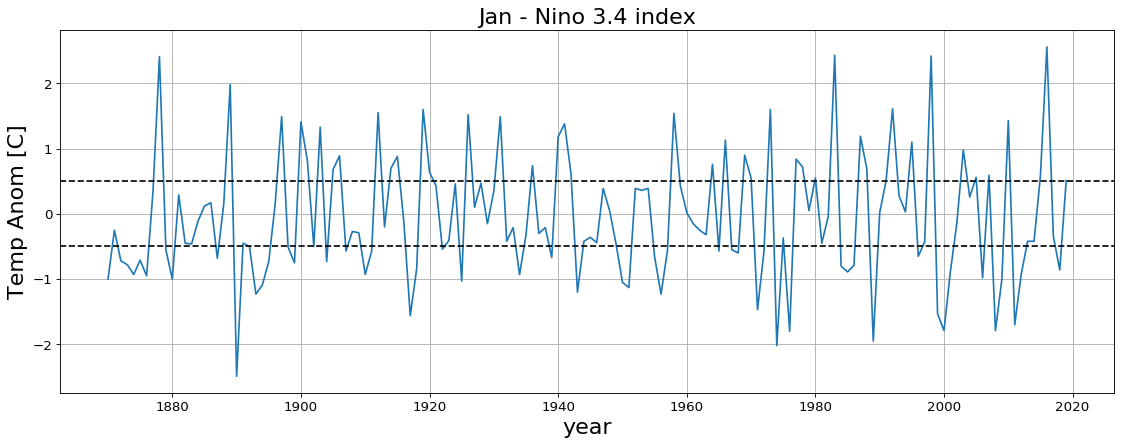

In [0]:
#now we have a pandas dataframe which is convenient to explore subsets of the data:
fig, ax = plt.subplots(num=None, figsize=(17, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(DFnino34['year'],DFnino34['Jan'])
ax.axhline(.5, color='k', ls='--')
ax.axhline(-.5, color='k', ls='--')
plt.grid(True)
plt.ylabel('Temp Anom [C]',fontsize=20)
plt.xlabel('year',fontsize=20)
plt.title('Jan - Nino 3.4 index',fontsize=20)
plt.show()

**The seaborn tool box, combines very well with Pandas Dataframes for Visualizations and in a few lines of code you can make informative plots** 

In [0]:
DFnino34.head()

,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1870,-1.00,-1.20,-0.83,-0.81,-1.27,-1.08,-1.04,-0.88,-0.53,-0.92,-0.79,-0.79
1,1871,-0.25,-0.58,-0.43,-0.50,-0.70,-0.53,-0.60,-0.33,-0.24,-0.33,-0.31,-0.58
2,1872,-0.72,-0.62,-0.50,-0.77,-0.62,-0.52,-0.32,-0.85,-1.02,-0.94,-0.79,-0.88
3,1873,-0.78,-1.01,-1.31,-0.67,-0.53,-0.48,-0.58,-0.39,-0.34,-0.78,-0.77,-0.70
4,1874,-0.93,-1.06,-1.40,-0.94,-0.86,-0.72,-1.00,-1.05,-1.13,-1.25,-1.33,-1.14


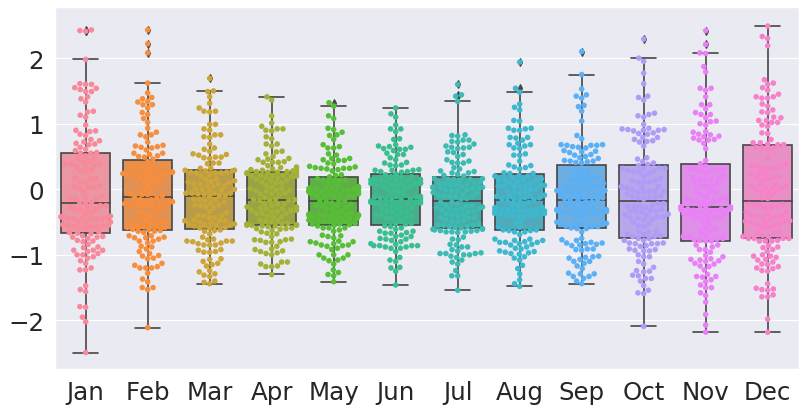

In [0]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
sns.set(font_scale = 2)
ax = sns.swarmplot(data=DFnino34.iloc[:-12,:].drop(columns=['year']))
ax = sns.boxplot(data=DFnino34.iloc[:-12,:].drop(columns=['year']))

**Let's examine some of the leading modes of variance using our EOF toolbox and make sure our data set is truly aligned**

...Latitude Weighting...
...Computing EOFs...
...Done...


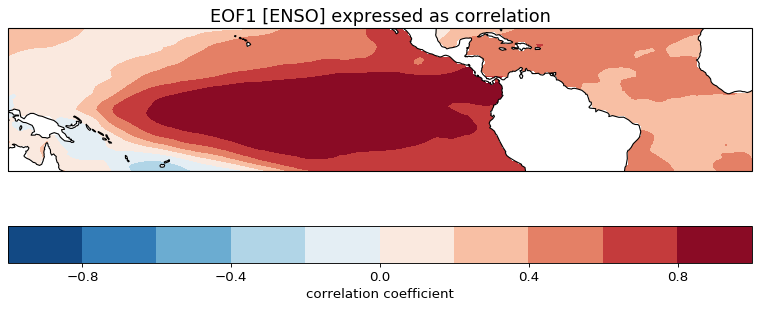

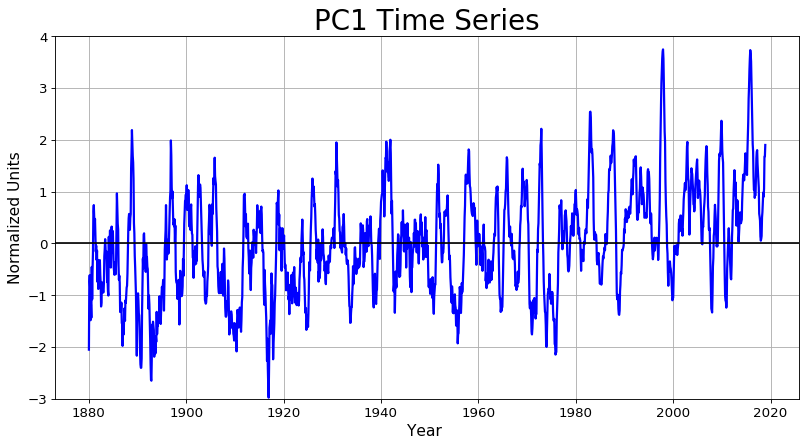

In [0]:
#we have to area weight the grid cells
print('...Latitude Weighting...')
coslat = np.cos(np.deg2rad(lats[65:110]))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(sst[:,65:110,130:], weights=wgts)

print('...Computing EOFs...')
eof1 = solver.eofsAsCorrelation(neofs=5)
pc1 = solver.pcs(npcs=5, pcscaling=1)
print('...Done...')

plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
clevs = np.linspace(-1, 1, 11)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = ax.contourf(lon[130:], lats[65:110], eof1[0,:,:].squeeze(), clevs,
                   transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r)
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('correlation coefficient', fontsize=12)
plt.title('EOF1 [ENSO] expressed as correlation', fontsize=16)

 # Plot the leading PC time series.
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(dtvec,pc1[:,0], color='b', linewidth=2)
plt.axhline(0, color='k')
plt.title('PC1 Time Series',fontsize=25)
plt.xlabel('Year ')
plt.ylabel('Normalized Units')
plt.grid(True)
# plt.xlim(1962, 2018)
plt.ylim(-3, 4)

plt.show()

**Lets see if our leading EOF is the El Nino index:**

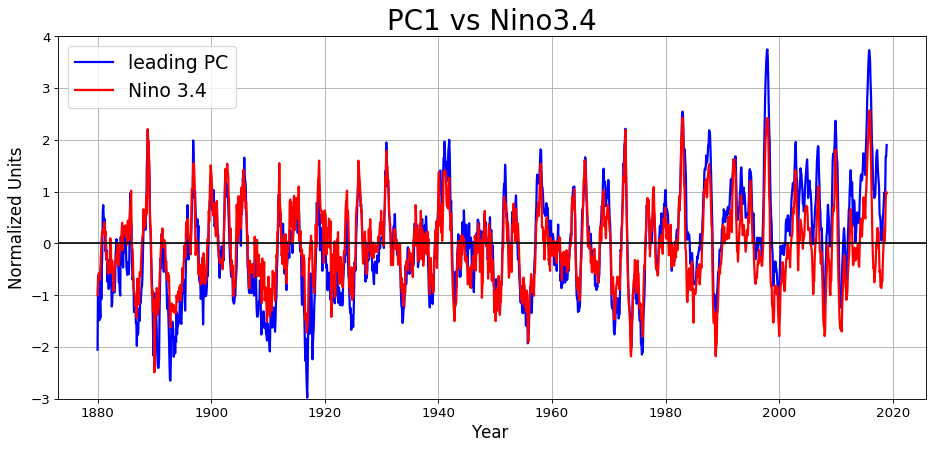

correlation: 0.8453748435703755


In [0]:
plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(dtvec,pc1[:,0], color='b', linewidth=2,label='leading PC')
plt.plot(dtvec,TS34, color='r', linewidth=2,label='Nino 3.4')
plt.axhline(0, color='k')
plt.title('PC1 vs Nino3.4',fontsize=25)
plt.xlabel('Year ',fontsize=15)
plt.ylabel('Normalized Units',fontsize=15)
plt.grid(True)
plt.ylim(-3, 4)
plt.legend(fontsize=17)
plt.show()

print('correlation:', np.corrcoef(pc1[:,0],TS34)[0][1])
#it looks to be! 

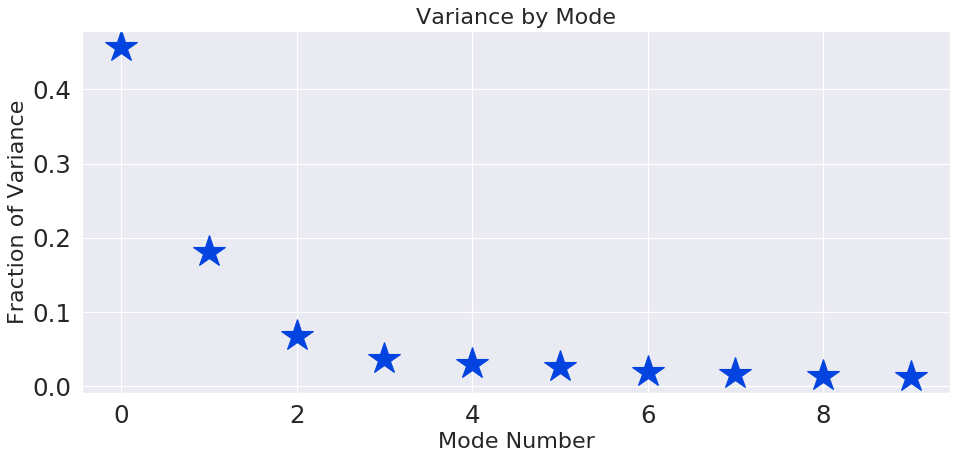

In [0]:
plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
variance_fractions = solver.varianceFraction()
plt.plot(variance_fractions[0:10],'*',markersize=30,color=sns.xkcd_rgb["blue"])
plt.ylabel('Fraction of Variance',fontsize=20)
plt.xlabel('Mode Number',fontsize=20)
plt.title('Variance by Mode',fontsize=20)
plt.grid(True)
plt.show()


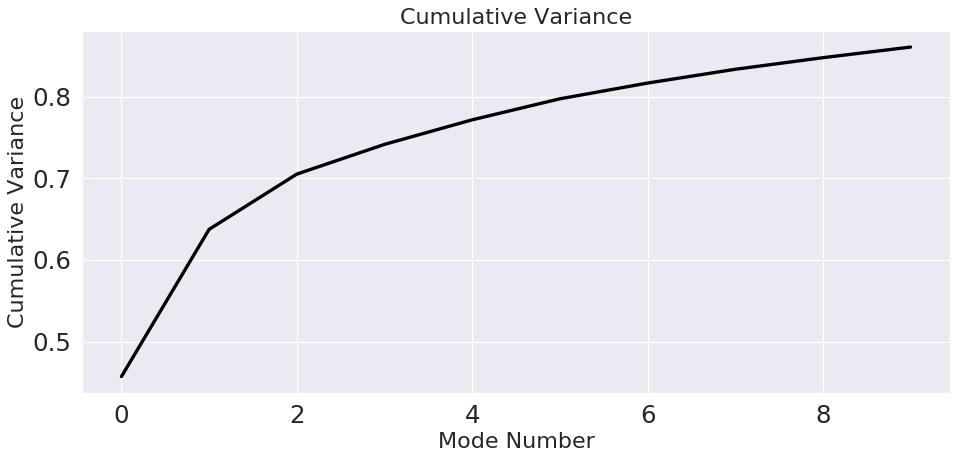

In [0]:
plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
variance_fractions = solver.varianceFraction()
plt.plot(np.cumsum(variance_fractions[0:10]),color=sns.xkcd_rgb["black"],linewidth=3)
plt.ylabel('Cumulative Variance',fontsize=20)
plt.xlabel('Mode Number',fontsize=20)
plt.title('Cumulative Variance',fontsize=20)
plt.grid(True)
plt.show()

**What do these other modes look like?**

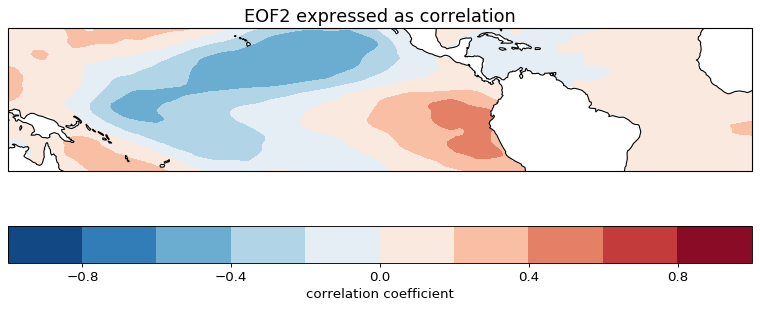

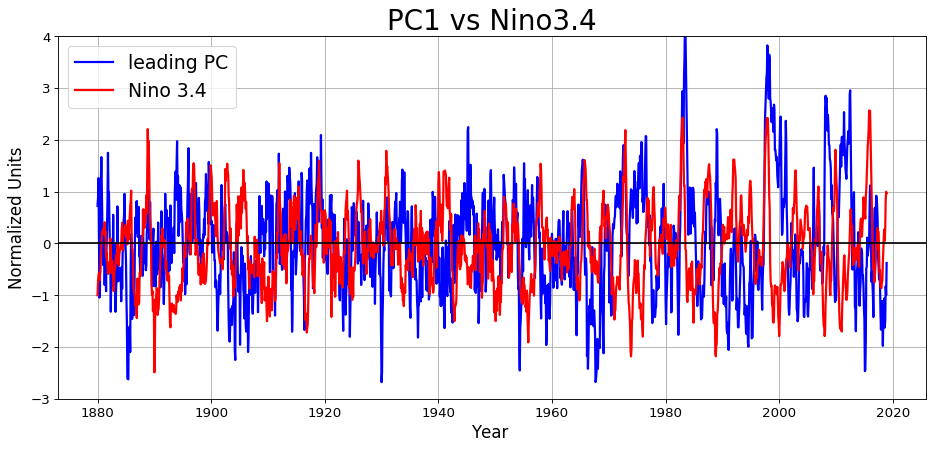

correlation: -0.0757526758126308


In [0]:
#What do the other modes look like?

plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
clevs = np.linspace(-1, 1, 11)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = ax.contourf(lon[130:], lats[65:110], eof1[2,:,:].squeeze(), clevs,
                   transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r)
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('correlation coefficient', fontsize=12)
plt.title('EOF2 expressed as correlation', fontsize=16)
plt.show()

plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(dtvec,pc1[:,2], color='b', linewidth=2,label='leading PC')
plt.plot(dtvec,TS34, color='r', linewidth=2,label='Nino 3.4')
plt.axhline(0, color='k')
plt.title('PC1 vs Nino3.4',fontsize=25)
plt.xlabel('Year ',fontsize=15)
plt.ylabel('Normalized Units',fontsize=15)
plt.grid(True)
plt.ylim(-3, 4)
plt.legend(fontsize=17)
plt.show()

print('correlation:', np.corrcoef(pc1[:,2],TS34)[0][1])


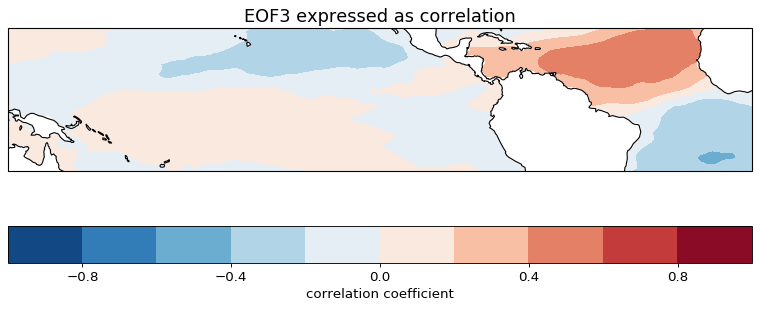

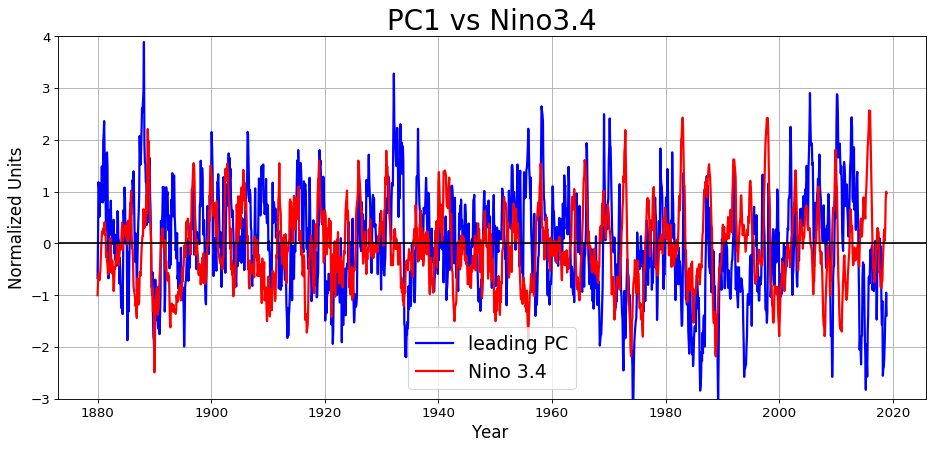

correlation: 0.0704209662303253


In [0]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
clevs = np.linspace(-1, 1, 11)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = ax.contourf(lon[130:], lats[65:110], eof1[3,:,:].squeeze(), clevs,
                   transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r)
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('correlation coefficient', fontsize=12)
plt.title('EOF3 expressed as correlation', fontsize=16)
plt.show()

plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(dtvec,pc1[:,3], color='b', linewidth=2,label='leading PC')
plt.plot(dtvec,TS34, color='r', linewidth=2,label='Nino 3.4')
plt.axhline(0, color='k')
plt.title('PC1 vs Nino3.4',fontsize=25)
plt.xlabel('Year ',fontsize=15)
plt.ylabel('Normalized Units',fontsize=15)
plt.grid(True)
plt.ylim(-3, 4)
plt.legend(fontsize=17)
plt.show()

print('correlation:', np.corrcoef(pc1[:,3],TS34)[0][1])

**We can create arrays of where the Nino3.4 values are greater than (or less than) the Nino/Nina Threshold [+ - 0.5C]** 

This will give us an idea of if there is a significant signal that the networks can look for in the SST field

In [0]:
indNino = np.where(TS34>0.5)
indNina = np.where(TS34<-0.5)

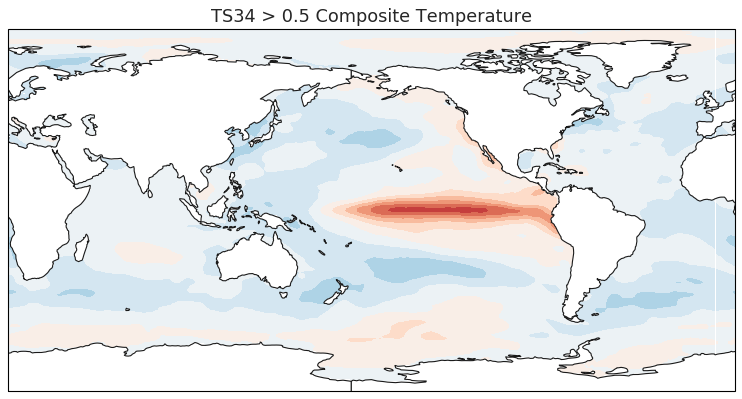

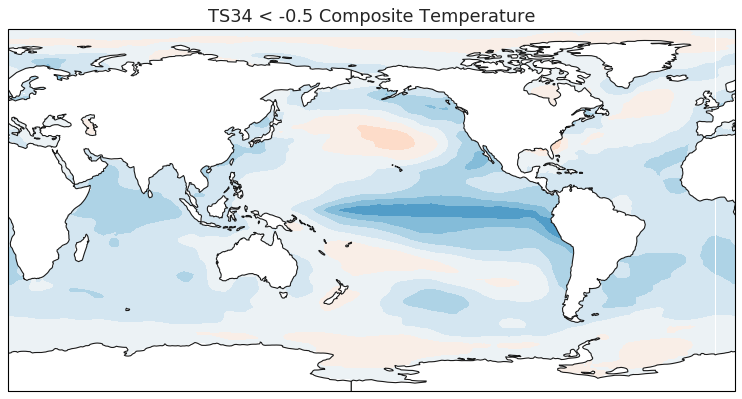

In [0]:
#Let's make some Composites based on the Nino3.4 index to see what the Neural Network should be looking for: 

plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
clevs = np.linspace(-2, 2, 17)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = ax.contourf(np.squeeze(lon), np.squeeze(lats), np.squeeze(np.mean(sst[indNino,:,:],axis=1)), clevs,
                   transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r)
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
plt.title('TS34 > 0.5 Composite Temperature', fontsize=16)
plt.show()

plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
clevs = np.linspace(-2, 2, 17)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = ax.contourf(np.squeeze(lon), np.squeeze(lats), np.squeeze(np.mean(sst[indNina,:,:],axis=1)), clevs,
                   transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r)
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
plt.title('TS34 < -0.5 Composite Temperature', fontsize=16)
plt.show()



Now that we have a good understanding of the data, we will prep our data for input to the neural networks. **As explained below**, some ML methods are very sensitive to the mean and variance of the input data, and find it difficult to converge without a 0 mean and 1 std. For this project we will be using each lat lon point as an input to a fully connected network. You can therefore think of each lat/lon as an individual predictor for the model. We therefore choose to center and standardize each lat/lon point rather than the global SST values. 



NOTE. This input field obviously suffers from multicolinearity issues as neighboring grid-points will be identical. We could therefore use our principal compnent analysis as inputs instead, we saw that the first 10 modes capture 85 percent of variance (this is just in the tropics of course). However, since the final intent of this network is to answer science questions about the input space, that is probably not the best idea. It would eliminate the input correlation, but perhaps destroy some of the scientific meaning. 

In [0]:
# The data came demeaned by month, but let's run through a little exercise anyway to see what that would look like: 
#the easiest way to do this is to fit an regression to each data point with the 6 lead harmonics of the yearly cycle,
#this will take care of the trend also. 

#function to remove trend, mean, and annual cycle for a time series: 
def removeSC(TS):

  O1 = 1/365.25 #for daily data (365.25 days in a year)
  T = np.array(range(len(TS))) #index of days
  if np.sum(TS.mask) > 0:
    solu = np.zeros_like(TS)
    model = np.zeros_like(TS)
  else:
    A = np.array([np.ones(TS.shape[0]),T,np.cos(2*np.pi*T*O1),np.sin(2*np.pi*T*O1),
                np.cos(2*np.pi*T*O1*2),np.sin(2*np.pi*T*O1*2),
                np.cos(2*np.pi*T*O1*4),np.sin(2*np.pi*T*O1*4),
                np.cos(2*np.pi*T*O1*8),np.sin(2*np.pi*T*O1*8),
                np.cos(2*np.pi*T*O1*16),np.sin(2*np.pi*T*O1*16)])
    A = np.transpose(A)
    #solve for the weights.
    solu = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(A),A)),np.transpose(A)),TS)
    model = np.matmul(A,solu) #linear model of vars.
  return model, solu


**this next bit of code takes a second, feel free not to run it** 

This is detrending every point in the field. 

In [0]:
# this takes a while to run so feel free not to do so:

# #now remove it by lat lon point:
# #anomaly: 
sst_a =np.zeros_like(sst)

for la in range(sst.shape[1]):
  for lo in range(sst.shape[2]):
    [ms,ss] = removeSC(sst[:,la,lo])
    sst_a[:,la,lo] = sst[:,la,lo]-ms


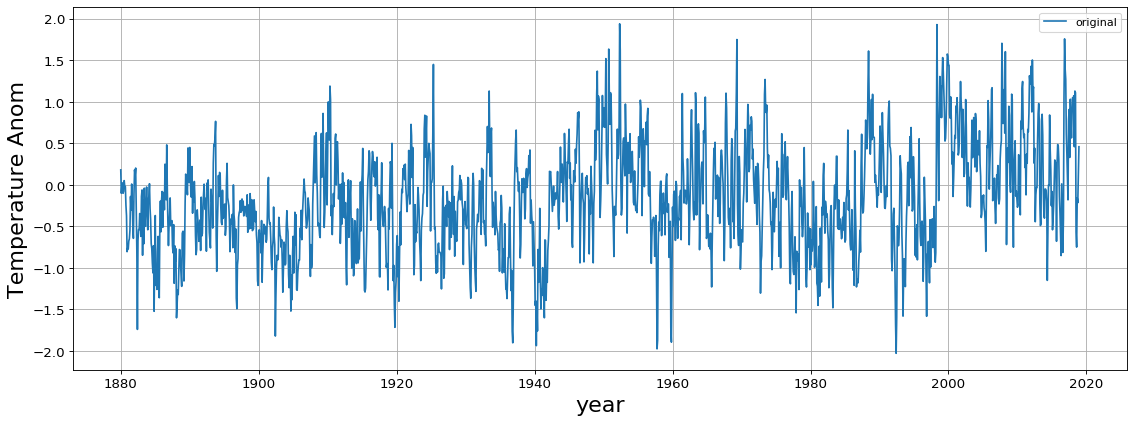

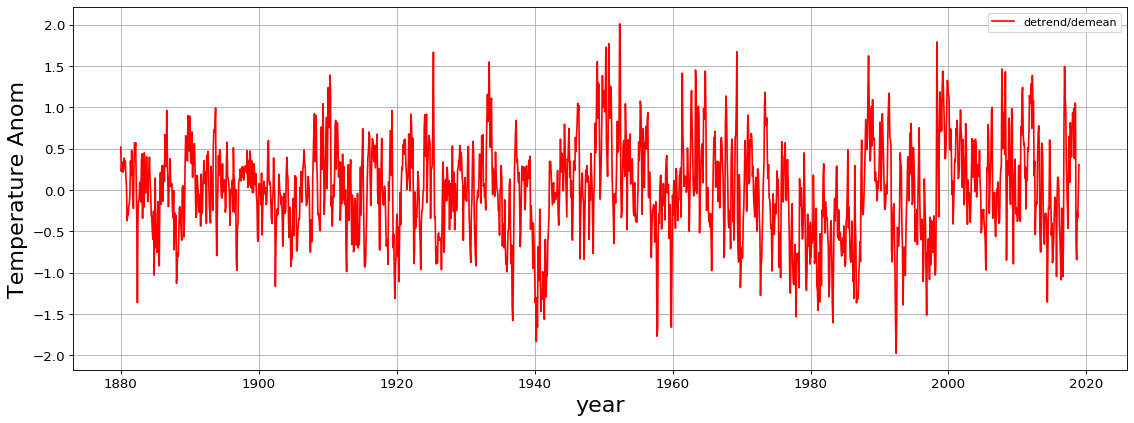

Trend is gone!
standard deviation: 0.5838652158939454
mean: 4.153352322338715e-16


In [0]:
# Let's plot a single point in the midlatitudes time to see if we can gain anymore insight: 
latwant = 32  #N
lonwant = 180 #dateline

#find the closest index to the desired points:
latidx = (np.abs(lats- latwant)).argmin()
lonidx = (np.abs(lon- lonwant)).argmin()


plt.figure(num=None, figsize=(17, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(dtvec,sst[:,latidx,lonidx],label='original')
plt.grid(True)
plt.ylabel('Temperature Anom', fontsize=20)
plt.xlabel('year', fontsize=20)
plt.legend()
plt.show()




plt.figure(num=None, figsize=(17, 6), dpi=80, facecolor='w', edgecolor='k')
#remove trend and me and stuff: 
[ms,ss] = removeSC(sst[:,latidx,lonidx])
sst_a2 = sst[:,latidx,lonidx]-ms
plt.plot(dtvec,sst_a2,label='detrend/demean',color='r')
plt.grid(True)
plt.ylabel('Temperature Anom', fontsize=20)
plt.xlabel('year', fontsize=20)
plt.legend()
plt.show()

print('Trend is gone!')
print('standard deviation:',np.std(sst_a2))
print('mean:',np.mean(sst_a2))


**We should then make the standard deviation = 1 by dividing by the standard deviation**

standard deviation: 0.5838652158939454
standard deviation: 1.0


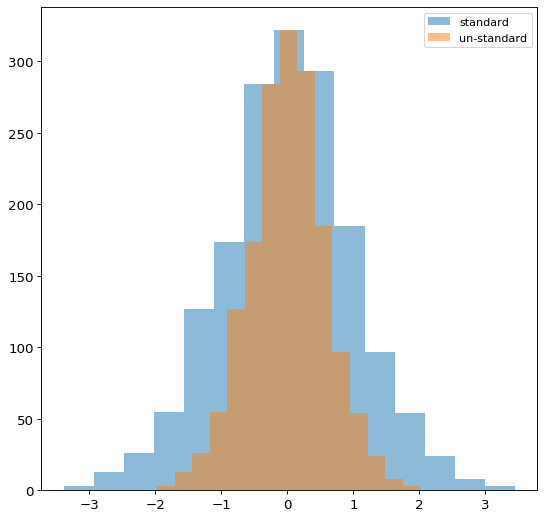

In [0]:
print('standard deviation:',np.std(sst_a2))
sst_a3 = sst_a2/np.std(sst_a2)
print('standard deviation:',np.std(sst_a3))

plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.hist(sst_a3,15,alpha=0.5,label='standard')
plt.hist(sst_a2,15,alpha=0.5,label='un-standard')
plt.legend()
plt.show()

#we now have a "normal" distribution

# Data Splitting for Cross Validation & Time Series data:

---
This will be covered in the next talk, but is here for posterity and to help the reader.
---

Fig 1. Train Validate Test ![WEC2019](https://drive.google.com/uc?id=1QyFEedeBG05LkWWdITnNYbJn9tswb-hU)



## The Importance of a Good Data Split. 

The goal of any emperical model is to generalize well to out of sample data. Overfitting to training data is common and tuning to testing data is a machine learning sin. Figure 1. shows a data split for a machine learning project in earth science. The data is seperated into three categories (train/validate/test described below). 


Common practice in the wide world of machine learning is to grab data randomly from your full sample set to create your train/validate/test datasets. This is typically a good idea, because it ensures that you have representative samples present in each data category. However, is **not appropriate** with earth science because we tyipcally work with time series data. Slow moving modes (think ENSO or a pressure ridge or a cold front) typically persist for mutliple time samples. If data is grabbed randomly, there will likely be high correlation between input/target pairs in the training and testing dataset. This will artifically inflate the skill of your model as you have essentially trained to your testing dataset. Thus, in earth science, it is best to seperate data by date and allow a decorrelation time window in between these datasets. 

***
##Training data: 
***
This is the data that the model sees and learns from (learning model parameters (weights and biases in the case of a neural network)). Typically ~80% of the data should fall in this category. 
***
##Validation data: 
Validation data is used to test for overfitting, and to tune machine learning hyperparameters. After every training cycle of your model, you should evaluate the skill of the model on the validation data. Save the model everytime that this the validation skill is improved. The model sees this data but does not learn parameters from it. Typically ~10% of the data falls in this category. 


Figure 2. shows the learning process of a empirical model that is eventually overfitting to the training data and demonstrates the value of validation data. The maximum value of a machine learning model occurs at the minimum "loss" for whatever error metric you are trying to minimize [e.g. mean squared error, categorical cross-entropy, etc.]. It is important to stop training your model at this minimum. 

***



## Testing data: 
As soon as you look at your testing data, it is corrupted. You should have no knowledge of this data except that it is drawn from a stationary sample which is well represented by your training data.  The very last task of any machine learning project is to evaluate skill on this data set. It is improper to test the skill, change the model and then test again, in a sense, you are then training to your testing data. The testing data set should have representative samples from every class or task that the machine learning model is trying to predict. Typically ~10% of the data falls in this category. 

Fig. 2 Overfitting ![WEC2019b](https://drive.google.com/uc?id=1cAoc-i72qQQkp_6jSy76eY1GJYCgqftQ)


---

In example, if I were creating a machine learning trade wind emulator around the Hawaiian Islands and I had 20 years of hourly data from every June, July, August, September, the cleanest way to split the data is by year:

- **Training:** years 1-18 
- **Validate:** year 19 
- **Testing:** year 20

Where the 8 months in between each year act as a decorrelation time window which guarantees independent data. 


Another rigorous data splitting scheme is [k-folds cross-validation ](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation)[explaination linked]. In which validation data is selected from the training data in order to tune on a larger sample size, and thus generalize better. 


--- 
Common machine learning libraries have easy commands for determining data splits [see[ sci-kit learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), [keras](https://keras.io/models/sequential/), etc...]. But be careful how these splits are made (they could be randomly selected), often it is wise to just create seperate time files for seperate instances [I.E. GeopotentialHeight_0101_2000_to_1231_2000.nc etc....] and keep the training/testing/validation datasets in different file locations. 

# Data Pre-Processing - Transformation of Inputs and Outputs

**!! A classic reference that includes the mathematical underpinnings for everything in this section is the paper "[Back Propagation](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf)" by Yann LeCun from 2012" please see this work for further details !!**

Data pre-processing includes data cleaning, normalization, transformation, feature extraction and selection, etc. The product of data pre-processing is the final training/validation and testing sets. This is a crucial step, and cleaning and data creation is likely what you will spend most of a projects time on. 

The first step is to clean your data as much as possible, make sure that the predictors are the ones that you intend, and things are lining up in time, additionally determine what outliers are erroneous and what are legitimate (but be careful not to bias your data in the process). Good data in = optimal model, Bad data = garbage model. 

**Normalization/Standardization** is common (and almost universally used) when data inputs have different ranges. The goal is to change the numeric values to a common scale. In example, temperature in the mid-latitudes, ranges from about 0-40 $C$ while outgoing longwave radiation ranges from 100-300 $W/m^2$, and SST. A neural network just sees numbers and will treat predictor variables with higher values as more important, thus affecting the gradient fields and taking longer to find global/local loss field minimums. 


Data pre-processing and normalization not only improve your model, but also speed up the training time for your machine learning tasks. 


**LeCun 2012 on Back Propagation and Best Practices:**
---
*Backpropagation can be very slow particularly for multilayered networks where the cost surface is typically non-quadratic, non-convex and high dimenshional with many local minima and/or flat regions. There is no formula to guarantee that **1.** the network with converge to a good solution **2.** convergence is swift, **3.** convergence even occurs at all. [...] However, [there are] a number of tricks that can greatly improve the chances of finding a good solution while decreasing the convergence time often by orders of magnitude*

**Shuffling the examples:**

*Networks learn the fastest form the most unexpected sample. Therefore, it is advisable to choose a sample at each iteration that is most unfamiliar to the system*

You can discover the value of an input by looking at the error difference between a predicted value and the ground truth. If this error is high, there is a lot to learn. 

1. Shuffle the training set so that successive training examples rarely belong to the same class. 

2. Present input examples that produce large error more frequently than examples producing small error. 


**Normalizing / Prepping the Inputs:** 

Convergence is usually faster if the average of each input variable over the training set is close to zero. Convergence is also faster if the inputs are scaled so that all have about the same covariance. [LeCunn 2012]. 


1. The average of each input variable over the training set should be close to zero
2. Scale inpute variables so that their covariances are about the same. 
3. Input variables should be uncorrelated if possible (multicolinearity argument, [PCA whitening](http://ufldl.stanford.edu/tutorial/unsupervised/PCAWhitening/) can assist in eliminating this)

Figure 3.  from LeCun 2012 shows a common data preprocessing work flow between two correlate variables. 


**Outputs** 

Outputs should be scaled in a sensible way according to whatever the machine learning model is outputing (the final activation in a Neural Network). In example, if your final layer is a sigmoid, your target variables need to be scaled between 0 and 1.  

**------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Remember, you should never look at your testing dataset, therefore you should create your normalization dictionaries [min/max/mean/standard deviation parameters] from your training dataset alone, then use these parameters to scale your validation and testing data**

**------------------------------------------------------------------------------------------------------------------------------------------------------------**

LeCun 2012 - Normalization process ![Lecunn 2012](https://drive.google.com/uc?id=11g1RYbHiks3mCMXegbIzcEpjMeFALvq8)


The following are standard Normalization/Standardization techniques but are not necessarily the optimal choice. Scaling can dramatically effect ML results, it is best to try multiple methods and multiple whitening techniques. Thus, this is another hyperparameter to tune in your machine learning work flow: 

1. Min-Max Scaling (scales the data between [0,1]) by the minimum and maximum values: 

Min Max Scaling![MMscale](https://drive.google.com/uc?id=1cqo6tZNlBZdLyVHIFgnC1y_xmeXBhSjM)

2. Mean-Variance Scaling (removes the mean and scale the values by it's standard deviation): 

Mean Std Scaling![MMscale](https://drive.google.com/uc?id=1YKhsn_rtR00dUAtQK6ApeJ3valldR2zM)





#Data We Will Use in this Tutorial: 
---
---
We are using two datasets for this tutorial. **1**. ENSO time series. **2.** 1/4-degree Community Atmosphere Model (CAM5) output
---

## Data Set 1:  ENSO PREDICTION


ENSO 1998![ENSO1998](https://drive.google.com/uc?id=1xWRCICvpskmpOSwWWz78GRmCsO3Twdym
)

## Description: 
Nino3.4 index time series from the [NCAR Climate Gateway](https://www.earthsystemgrid.org/) and Monthly SST Anomalies from the [Cobe V2. dataset](https://www.esrl.noaa.gov/psd/data/gridded/data.cobe2.html)


**Nino3.4** is a time series of sea surface temperature [SST] anomalies averaged in the tropical pacific (lat [5N-5S], lon [170W-120W]). The index typically consists of a 5- month running mean SST field

The **Cobe V2.** data set is a 1.0 degree latitude x 1.0 degree longitude global grid (360x180) resolution sea surface tempearture field which spans latitude: 89.5N - 89.5S, and longitude: 0.5E - 359.5E. is analysis, a daily SST field is constructed as a sum of a trend, interannual variations, and daily changes, using in situ SST and sea ice concentration observations. 

## Train/Validate/Test Split: 

**Train:** 

**Test:**
 


## Preprocessing: 



##Data Set 2: CAM5 Climate Data - Atomspheric River / Tropical Cyclone Segmentation

<!-- Exascale 2018![Thorten2018](https://drive.google.com/uc?id=1GB-J-KDb6mQVDKSaU4ozMatXPR88GAKG) -->


Segmentation ARs Tcs![Thorten2018b](https://drive.google.com/uc?id=1h38eKqLfwRYVxqFWwR6aEaoGZTwIHHgu)


From reference [2] 'Exascale Deep Learning for Climate Analytics- Thorsten et al 2018'. 

## Description:

Today we are using a subset of the dataset used in the study: 
Exascale Deep Learning for Climate Analytics. 

The Data description for the entire data set is below. However, for times sake, will only be utilizing a few years. 

"We utilize
0.25-degree Community Atmosphere Model (CAM5) output
for this study. Climate variables are stored on an 1152×768
spatial grid, with a temporal resolution of 3 hours. Over 100
years of simulation output are available in HDF5 files. Ideally,
climate scientists would hand-label pixel masks corresponding
to events. In practice, scientists currently use a combination
of heuristics to produce masks on large datasets. The first
step is to process climate model output with the Toolkit for
Extreme Climate Analysis [1], [11] to identify TCs. A floodfill
algorithm is used to create spatial masks of ARs [12], which
provides the labels for our training process" - From the Authors

The task is to draw boundaries around 2 sets of extreme events: [Atmospheric Rivers](http://glossary.ametsoc.org/wiki/Atmospheric_river), and [Tropical Cyclones](https://en.wikipedia.org/wiki/Tropical_cyclone), and determine the rest of the image as background pixels. 

There are 16 global variables (water vapor, wind, precipitation, temperature, pressure, etc)

**------------------------------------------------------------------------------------------------------------------------------------------------------------**
## Train/Validate/Test Split:
1996 global variables:

**Training:** 
80%

**Validation:** 
10%

**Testing:** 
10%

**------------------------------------------------------------------------------------------------------------------------------------------------------------**
## Preprocessing:

Per Channel (I think global (not pixel-wise)) Min/Max Normalization: 

Each input variable is scaled between zero and 1. Giving equal weight across the predictors.

Min Max Scaling![MMscale](https://drive.google.com/uc?id=1cqo6tZNlBZdLyVHIFgnC1y_xmeXBhSjM)

# References: 

## Pre-processing References:

- [Data Preprocessing for Supervised Leaning](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.104.8413&rep=rep1&type=pdf) -  Kotsiantis et al. 2006 

- [Efficient BackProp ](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf)LeCun Y.A., Bottou L., Orr G.B., Müller KR. (2012) Efficient BackProp. In: Montavon G., Orr G.B., Müller KR. (eds) Neural Networks: Tricks of the Trade. Lecture Notes in Computer Science, vol 7700. Springer, Berlin, Heidelberg


- [Stanford CS231n](https://cs231n.github.io/): Convolutional Neural Networks for Visual Recognition.

## Data References: 

[1] Prabhat, O. Ruebel, S. Byna, K. Wu, F. Li, M. Wehner, and W. Bethel,
“Teca: A parallel toolkit for extreme climate analysis,” Procedia Computer Science, vol. 9, pp. 866 – 876, 2012, proceedings of ICCS 2012

[2] Thorsten Kurth, Sean Treichler, Joshua Romero, Mayur Mudigonda, Nathan Luehr,Everett Phillips, Ankur Mahesh, Michael Matheson, Jack Deslippe, Massimiliano Fatica, Prabhat, and Michael Houston. 2018. Exascale Deep Learning for Climate Analytics. In Proceedings of the International Conference for High Performance Computing, Networking, Storage, and Analysis (SC ’18). IEEE Press, Piscataway, NJ, USA, Article 51, 12 pages. http://dl.acm.org/citation.cfm?id=3291656.3291724

[11] Prabhat, S. Byna, V. Vishwanath, E. Dart, M. Wehner, and W. D. Collins,
“Teca: Petascale pattern recognition for climate science,” in Computer
Analysis of Images and Patterns, 2015, pp. 426–436.

[12] C. A. Shields, J. J. Rutz, L.-Y. Leung, F. M. Ralph, M. Wehner,
B. Kawzenuk, J. M. Lora, E. McClenny, T. Osborne, A. E. Payne
et al., “Atmospheric river tracking method intercomparison project
(artmip): project goals and experimental design,” Geoscientific Model
Development, vol. 11, no. 6, pp. 2455–2474, 2018.
